#NAMA : FATHURRAHMAN NUR AZIZ
#NIM : 20.11.3694

##1. Import Library

In [1]:
import numpy as np
import pandas as pd
# from sklearn import datasets
import matplotlib.pyplot as plt
from itertools import product
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
# from sklearn.metrics import rand_score
# from sklearn.metrics import homogeneity_score
from sklearn.metrics import calinski_harabasz_score
# from sklearn.metrics import completeness_score
# from sklearn.metrics import v_measure_score
from sklearn.neighbors import NearestNeighbors

##2. Read Dataset

In [2]:
url = "https://raw.githubusercontent.com/azizfath/bddm3/main/week13/CC%20GENERAL.csv"
df = pd.read_csv(url)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


##3. DATA CLEANING & EDA

In [3]:
# Checking the percentage of missing data
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [4]:
# Dropping the missing data
df.dropna(inplace=True)

In [5]:
# Checking the percentage of missing data
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [6]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


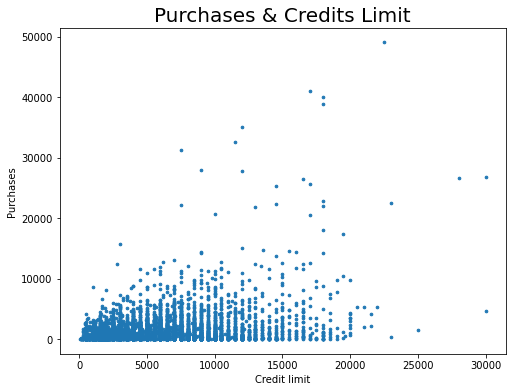

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(df['CREDIT_LIMIT'], df['PURCHASES'], s=7)
# sns.scatterplot(df['PURCHASES'],df['CREDIT_LIMIT'])
plt.title('Purchases & Credits Limit', fontsize =20)
plt.ylabel('Purchases')
plt.xlabel('Credit limit')

plt.show()

In [8]:
df_sub = df[['CREDIT_LIMIT','PURCHASES']].copy()
df_sub.head()

,CREDIT_LIMIT,PURCHASES
0,1000.0,95.40
1,7000.0,0.00
2,7500.0,773.17
4,1200.0,16.00
5,1800.0,1333.28


In [9]:
X = np.array(df_sub.iloc[:, [0,1]])

In [10]:
X[:10]

array([[ 1000.  ,    95.4 ],
       [ 7000.  ,     0.  ],
       [ 7500.  ,   773.17],
       [ 1200.  ,    16.  ],
       [ 1800.  ,  1333.28],
       [13500.  ,  7091.01],
       [ 2300.  ,   436.2 ],
       [ 7000.  ,   861.49],
       [11000.  ,  1281.6 ],
       [ 1200.  ,   920.12]])

##4. KMeans

Text(0, 0.5, 'wcss')

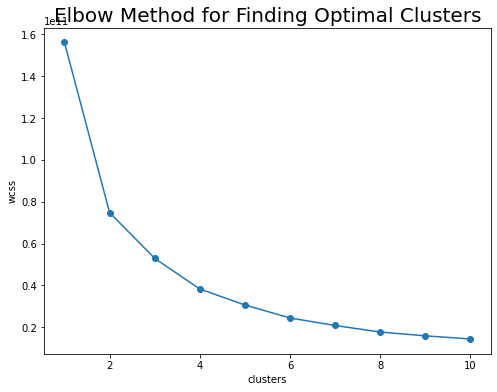

In [11]:
#elbow method
wcss= []

for i in range(1,11): 
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)

plt.figure(figsize=(8,6))    
plt.plot(range(1,11),wcss, marker='o')
plt.title('Elbow Method for Finding Optimal Clusters', fontsize =20)
plt.xlabel('clusters')
plt.ylabel('wcss')

In [12]:
#dari elbow tersebut bisa dikatakan cluster optimum diangka 2

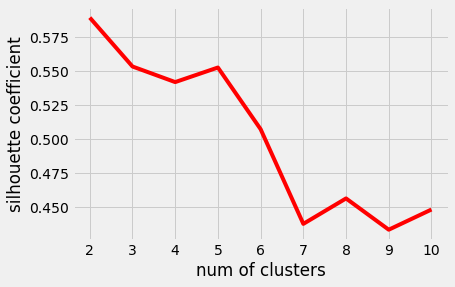

In [13]:
silhouette_coefficients = []
for i in range (2,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  score = silhouette_score(X,kmeans.labels_)
  silhouette_coefficients.append(score)

plt.style.use('fivethirtyeight')
plt.plot(range(2,11), silhouette_coefficients,c='r')
plt.xticks(range(2,11))
plt.xlabel('num of clusters')
plt.ylabel('silhouette coefficient')
plt.show()

In [14]:
#dari silhouette coefficient tersebut bisa dikatakan cluster optimum diangka 2

In [15]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_pred = kmeans.fit_predict(X)
kmeans_pred

array([0, 1, 1, ..., 0, 0, 0], dtype=int32)

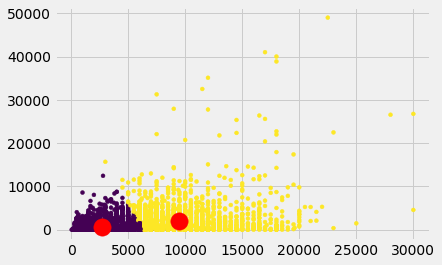

In [16]:
kmeans_cluster= KMeans(n_clusters=2, init='k-means++', max_iter=300,
                       n_init=10, random_state=0)

kmeans_result= kmeans_cluster.fit_predict(X)

plt.scatter(X[:,0], X[:,1], s=15, c=kmeans_result)
plt.scatter(kmeans_cluster.cluster_centers_[:,0],
            kmeans_cluster.cluster_centers_[:,1],
            s=300, c='r')
plt.show()

##5. DBSCAN Cluster

In [17]:
#hitung nearest neighbor untuk mendapatkan nilai epsilon paling efektif
nn_model = NearestNeighbors(n_neighbors=2)
nn_model.fit(X)
distances, indices = nn_model.kneighbors(X)

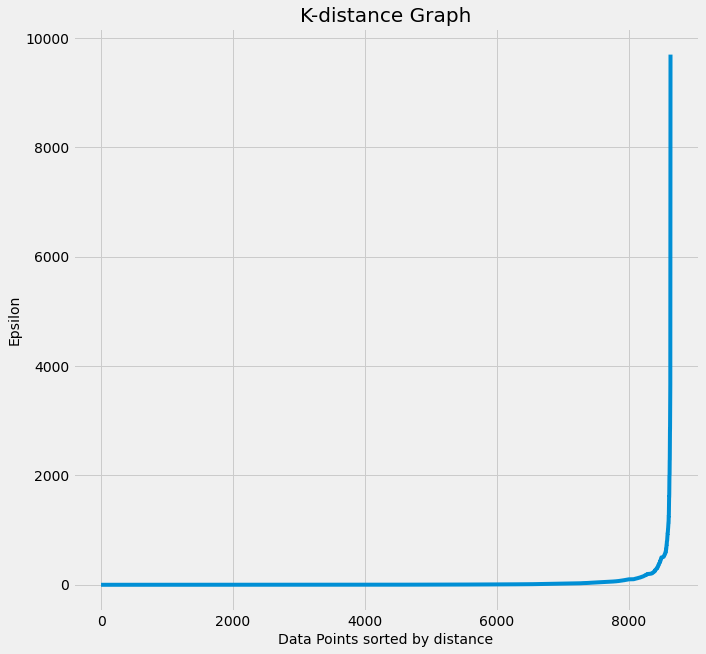

In [18]:
# plot k-distance
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

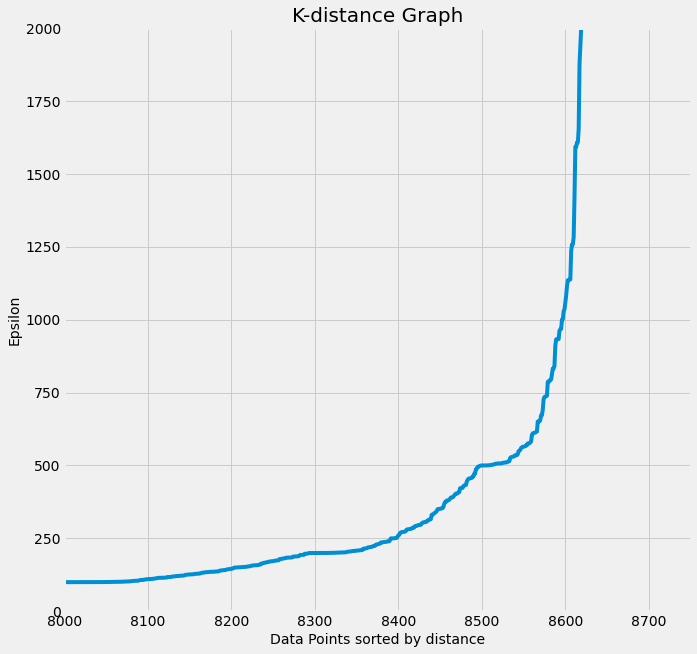

In [19]:
#zoom in ke area data 8000-8750 dan epsilon 0-2000
plt.figure(figsize=(10,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.xlim([8000,8750])
plt.ylim([0,2000])
plt.show()

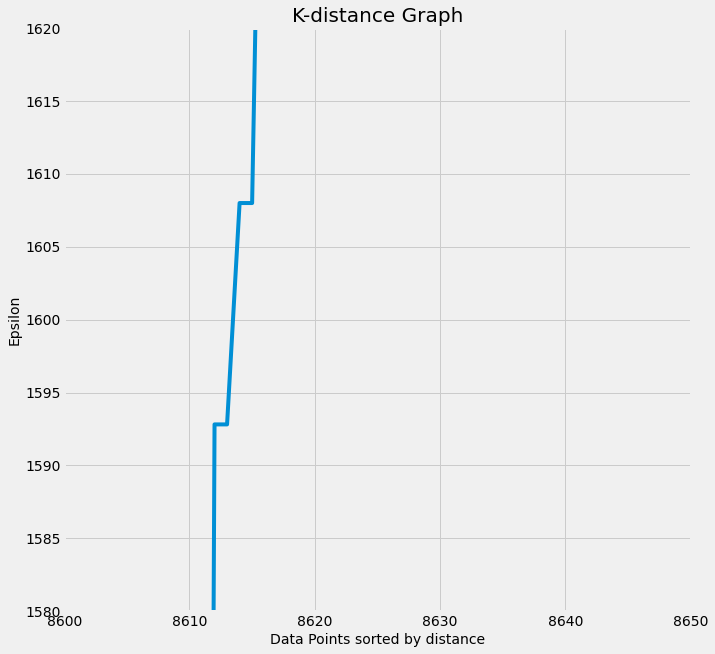

In [20]:
#zoom in ke area data 8600-8750 dan epsilon 1580-1620
plt.figure(figsize=(10,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.xlim([8600,8650])
plt.ylim([1580,1620])
plt.show()

In [21]:
#dari nilai tersebut maka bisa dikatakan epsilon maksimum ada diantara 1550 dan 1650

In [22]:
#coba membuat kombinasi terbaik antara epsilon 1550 dan 1650 untuk min sample 3-5
eps_values = np.arange(1580,1620,1)
min_samples = np.arange(3,5)
dbscan_params = list(product(eps_values,min_samples))

In [23]:
#list contains looping res
no_of_clusters = []
epsvalues = []
min_samp = []

#iteration over combination
for p in dbscan_params:
  #create a dbscan cluster based on a combinatin of parameters
  dbscan_cluster = DBSCAN(eps=p[0], min_samples=p[1]).fit(X)

  if len(np.unique(dbscan_cluster.labels_)) <=1:
    pass
  else: 
    no_of_clusters.append(len(np.unique(dbscan_cluster.labels_)))

  #append values to list
  epsvalues.append(p[0])
  min_samp.append(p[1])

In [24]:
 eps_min = list(zip(no_of_clusters, epsvalues, min_samp))
 eps_min_df = pd.DataFrame(eps_min,columns=['no_of_clusters', 'epsilon_values', 'minimum_points'])

 eps_min_df

,no_of_clusters,epsilon_values,minimum_points
0,3,1580,3
1,2,1580,4
2,3,1581,3
3,2,1581,4
4,3,1582,3
...,...,...,...
75,2,1617,4
76,3,1618,3
77,2,1618,4
78,3,1619,3


In [25]:
'''
karena tujuannya menghasilkan cluster == 2,
maka dapat menggunakan salah satu dari 
beberapa kombinasi parameter eops dan min_pts
'''
eps_min_df[eps_min_df['no_of_clusters']==2]

,no_of_clusters,epsilon_values,minimum_points
1,2,1580,4
3,2,1581,4
5,2,1582,4
7,2,1583,4
9,2,1584,4
11,2,1585,4
13,2,1586,4
15,2,1587,4
17,2,1588,4
19,2,1589,4


####create cluster

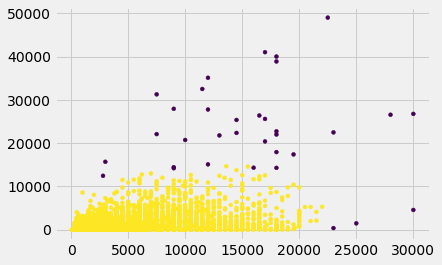

In [26]:
dbscan_cluster=DBSCAN(eps=1593, min_samples=4)
dbscan_cluster.fit(X)

dbscan_result = dbscan_cluster.labels_
plt.scatter(X[:,0], X[:,1], s=15, c=dbscan_result)
plt.show()

##5. cluster eval

###davies bouldin index DBI

In [27]:
dbi_kmeans = davies_bouldin_score(X, kmeans_result)
dbi_dbscan = davies_bouldin_score(X, dbscan_result)

print('DBI Kmeans Score: ', dbi_kmeans)
print('DBI DBSCAN Score: ', dbi_dbscan)

DBI Kmeans Score:  0.7316611581318277
DBI DBSCAN Score:  0.5595384449274067


###silhouette score

In [28]:
sil_kmeans = silhouette_score(X, kmeans_result)
sil_dbscan = silhouette_score(X, dbscan_result)

print('Silhouette Score Kmeans score: ', sil_kmeans)
print('Silhouette Score DBSCAN score: ', sil_dbscan)

Silhouette Score Kmeans score:  0.5893940857992109
Silhouette Score DBSCAN score:  0.8296929734396429


####Berdasarkan nilai DBI *(makin kecil makin bagus)* **maka DBSCAN lebih unggul** karena DBI DBSCAN (0.55) < DBI Kmeans (0.71)

####Berdasarkan Silhouette Score *(makin mendekati 1 makin bagus)* **maka DBSCAN lebih unggul** karena Silhouette Score DBSCAN (0.82) > Silhouette Score KMeans (0.58)

###Jadi berdasarkan dua nilai tersebut, maka DBSCAN lebih unggul daripada KMeans untuk kasus ini